In [17]:
# change to the root directory of the project
import os
if os.getcwd().split("/")[-1] == "examples":
    os.chdir('..')

In [18]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
import matplotlib.pyplot as plt
import numpy as np
import glob

from neurolib.models.jr import JRModel

import neurolib.utils.loadData as ld
import neurolib.utils.functions as func

# a nice color map
plt.rcParams['image.cmap'] = 'plasma'

In [20]:
model = JRModel()
model.params['duration'] = 2.0*1000

Bifurcation Diagram

In [21]:
max_y0 = []
min_y0 = []
max_y1 = []
min_y1 = []
max_y2 = []
min_y2 = []

model.params['sigma_ou'] = 0.0

# these are the different input values that we want to scan
p_inputs = np.linspace(-0.3, 1, 100)
for p_ext in p_inputs:
    model.params['p_ext'] = p_ext
    model.run()
    max_y0.append(np.max(model.y0[0, -int(1000/model.params['dt']):]))
    min_y0.append(np.min(model.y0[0, -int(1000/model.params['dt']):]))
    max_y1.append(np.max(model.y1[0, -int(1000/model.params['dt']):]))
    min_y1.append(np.min(model.y1[0, -int(1000/model.params['dt']):]))
    max_y2.append(np.max(model.y2[0, -int(1000/model.params['dt']):]))
    min_y2.append(np.min(model.y2[0, -int(1000/model.params['dt']):]))

Text(0, 0.5, 'Min / max y0')

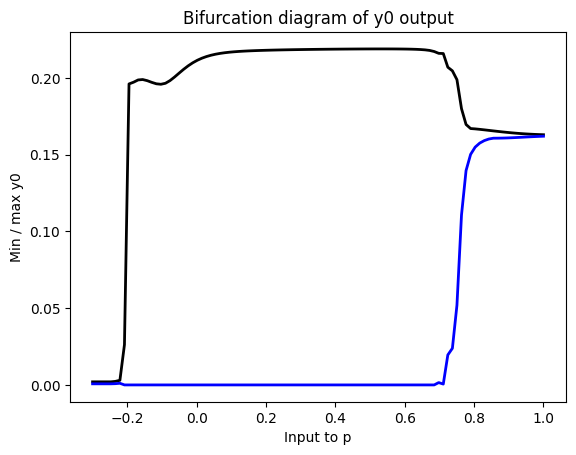

In [22]:
plt.plot(p_inputs, max_y0, c='k', lw = 2)
plt.plot(p_inputs, min_y0, c='b', lw = 2)
plt.title("Bifurcation diagram of y0 output")
plt.xlabel("Input to p")
plt.ylabel("Min / max y0")

Text(0, 0.5, 'Min / max y1')

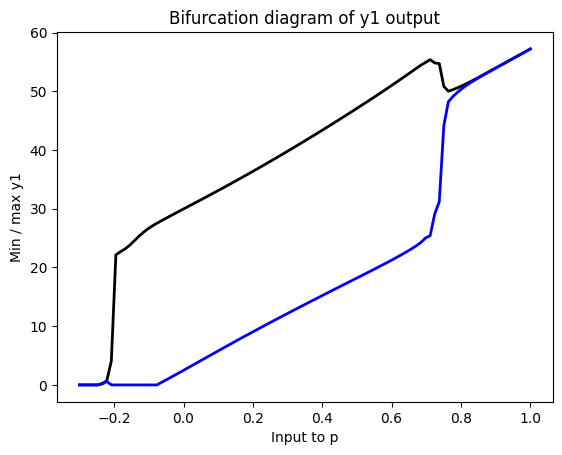

In [23]:
plt.plot(p_inputs, max_y1, c='k', lw = 2)
plt.plot(p_inputs, min_y1, c='b', lw = 2)
plt.title("Bifurcation diagram of y1 output")
plt.xlabel("Input to p")
plt.ylabel("Min / max y1")

Text(0, 0.5, 'Min / max y2')

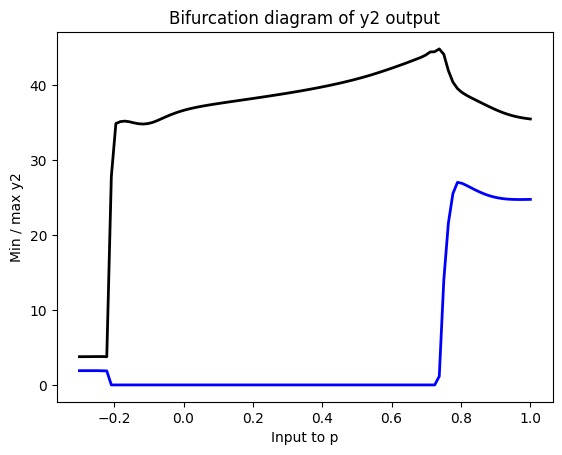

In [24]:
plt.plot(p_inputs, max_y2, c='k', lw = 2)
plt.plot(p_inputs, min_y2, c='b', lw = 2)
plt.title("Bifurcation diagram of y2 output")
plt.xlabel("Input to p")
plt.ylabel("Min / max y2")

Text(0, 0.5, 'Min / max y1 & y2')

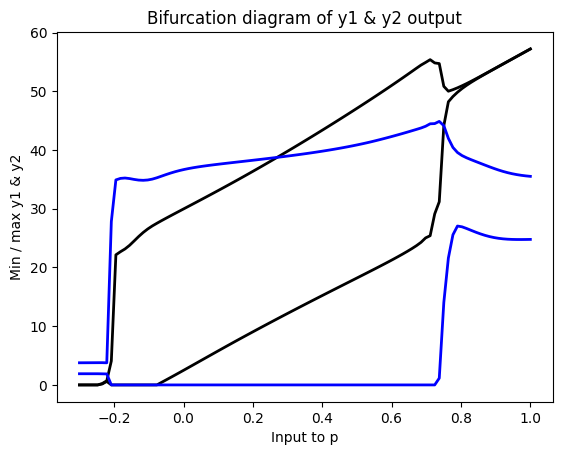

In [25]:
plt.plot(p_inputs, max_y1, c='k', lw = 2)
plt.plot(p_inputs, min_y1, c='k', lw = 2)
plt.plot(p_inputs, max_y2, c='b', lw = 2)
plt.plot(p_inputs, min_y2, c='b', lw = 2)
plt.title("Bifurcation diagram of y1 & y2 output")
plt.xlabel("Input to p")
plt.ylabel("Min / max y1 & y2")

Fazit: All output variables have their spike and fall at the same input 

Y0 & Y2: min values remain flat after spike (close to 0)
max values for y0 mainly constant after spike
max values for y2 minimal increase after spike

Y1: linear rising of max values after spike
linear rising of min values starting with larger input values
____

Spike: Around -0.209
Fall: Around 0.73


Single Node

In [27]:
model = JRModel()
model.params['duration'] = 10000

In [28]:
y0_values = []
y1_values = []
y2_values = []
p_inputs = [-0.25, 0.0, 0.8]
for p_ext in p_inputs:
    model.params['p_ext'] = p_ext
    model.run()
    y0_values.append(model.y0.T)
    y1_values.append(model.y1.T)
    y2_values.append(model.y2.T)

Text(0, 0.5, 'Activity y0 in kHz')

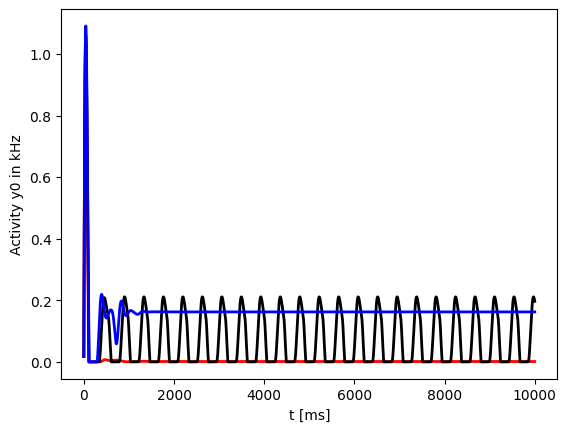

In [29]:
plt.plot(model.t, y0_values[0], c='r', lw = 2)
plt.plot(model.t, y0_values[1], c='k', lw = 2)
plt.plot(model.t, y0_values[2], c='b', lw = 2)
plt.xlabel("t [ms]")
plt.ylabel("Activity y0 in kHz")

Text(0, 0.5, 'Activity y1 in kHz')

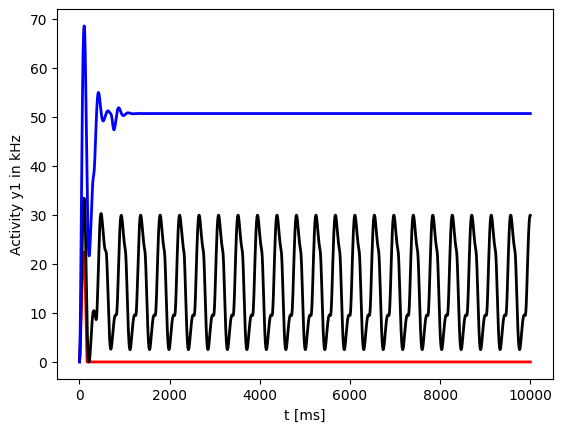

In [30]:

plt.plot(model.t, y1_values[0], c='r', lw = 2)
plt.plot(model.t, y1_values[1], c='k', lw = 2)
plt.plot(model.t, y1_values[2], c='b', lw = 2)
plt.xlabel("t [ms]")
plt.ylabel("Activity y1 in kHz")

Text(0, 0.5, 'Activity y2 in kHz')

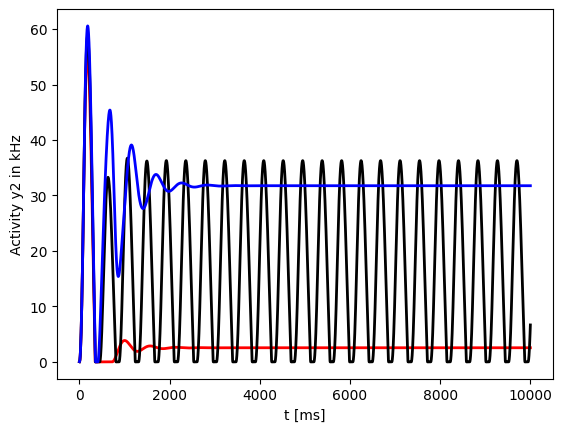

In [31]:
plt.plot(model.t, y2_values[0], c='r', lw = 2)
plt.plot(model.t, y2_values[1], c='k', lw = 2)
plt.plot(model.t, y2_values[2], c='b', lw = 2)
plt.xlabel("t [ms]")
plt.ylabel("Activity y2 in kHz")

Fazit: Same state variable behavior (upstate, downstate, oszillation) for same input values 